# Tugas Klasifikasi Rambu Jalan dengan KNN memanfaatkan HOG sebagai pengekstrak fitur citra.

Rizky Akhmad Fahreza - 24060121130081

## Mounting Collab ke drive

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Menyiapkan library yang digunakan

In [27]:
import os
from skimage.feature import hog
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

## Memuat dataset

In [28]:
dataset_path = '/content/drive/MyDrive/Kuliah/Semester 7/Visi Komputer/Tugas 1/Data_Set'

## Memuat gambar

### Membuat fungsi untuk memuat gambar

In [29]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = imread(os.path.join(folder, filename), as_gray=True)
        if img is not None:
            images.append(img)
            labels.append(label)
    return images, labels

### Mereferensikan path tiap label

In [30]:
# Data train
folder_train_positif = os.path.join(dataset_path, 'Positif')
folder_train_negatif = os.path.join(dataset_path, 'Negatif')

# Data test
folder_test_positif = os.path.join(dataset_path, 'Uji/Data Uji/positif')
folder_test_negatif = os.path.join(dataset_path, 'Uji/Data Uji/negatif')

### Memuat data foto dan digabungkan

In [31]:
# Data train
positif_train_images, positif_train_labels = load_images_from_folder(folder_train_positif, 1)
negatif_train_images, negatif_train_labels = load_images_from_folder(folder_train_negatif, 0)

train_images = positif_train_images + negatif_train_images
train_labels = positif_train_labels + negatif_train_labels

# Data uji
positif_test_images, positif_test_labels = load_images_from_folder(folder_test_positif, 1)
negatif_test_images, negatif_test_labels = load_images_from_folder(folder_test_negatif, 0)

test_images = positif_test_images + negatif_test_images
test_labels = positif_test_labels + negatif_test_labels

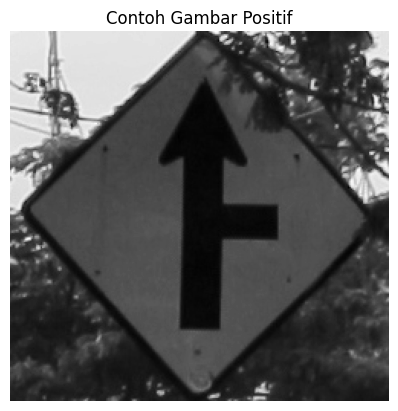

In [32]:
plt.imshow(positif_train_images[0], cmap='gray')
plt.title("Contoh Gambar Positif")
plt.axis('off')
plt.show()

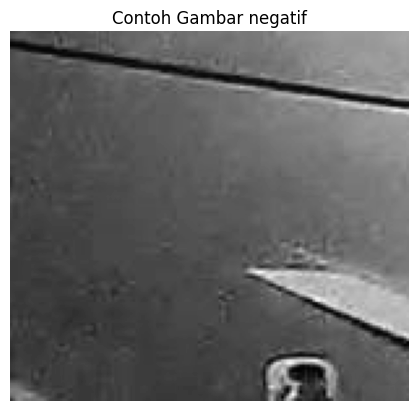

In [33]:
plt.imshow(negatif_train_images[1], cmap='gray')
plt.title("Contoh Gambar negatif")
plt.axis('off')
plt.show()

## Ektraksi Fitur menggunakan HOG

### Membuat fungsi ekstraksi fitur HOG

In [34]:
def extract_hog_features(images, target_size=(128, 128)):
    hog_features = []
    for image in images:
        # Resize gambar
        resized_image = resize(image, target_size)

        # Ekstraksi fitur HOG dari gambar yang sudah di-resize
        features = hog(resized_image, orientations=9, pixels_per_cell=(8, 8),
                                  cells_per_block=(2, 2), block_norm='L2-Hys')

        # Menambahkan vektor fitur HOG ke dalam list
        hog_features.append(features)

    return hog_features

### Mengekstraksi features dari data foto

In [35]:
# Features data train
train_features = extract_hog_features(train_images)

# Features data test
test_features = extract_hog_features(test_images)

### Melihat statistik deskriptif dari data train dan test yang sudah di ekstraksi fiturnya

In [36]:
df_train_features = pd.DataFrame(train_features)
df_train_features.describe()

,0,1,2,3,4,5,6,7,8,9,...,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.183108,0.083654,0.076326,0.083313,0.187110,0.093820,0.076775,0.077509,0.110988,0.223385,...,0.146807,0.186619,0.080475,0.072567,0.086722,0.185201,0.089406,0.075941,0.082497,0.126456
std,0.120757,0.091765,0.088029,0.092132,0.123134,0.100578,0.090140,0.088958,0.110072,0.122597,...,0.124597,0.115913,0.086875,0.084848,0.095588,0.121126,0.095710,0.086360,0.087426,0.115762
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076819,0.011853,0.006920,0.011208,0.081704,0.013826,0.012318,0.010856,0.021251,0.119760,...,0.037841,0.082956,0.011176,0.007235,0.011514,0.080902,0.012731,0.011764,0.010405,0.026321
50%,0.172888,0.049606,0.044683,0.049085,0.180298,0.058905,0.041972,0.042756,0.071091,0.244397,...,0.116671,0.188445,0.050248,0.042341,0.049357,0.177923,0.061193,0.040727,0.054088,0.090539
75%,0.273192,0.126571,0.115597,0.123601,0.278298,0.139421,0.110444,0.112367,0.170415,0.302974,...,0.253131,0.276282,0.124829,0.100048,0.131028,0.278217,0.133172,0.112530,0.126361,0.210872
max,0.589395,0.421651,0.417828,0.421361,0.551747,0.487920,0.536361,0.412036,0.490225,0.623483,...,0.551602,0.500164,0.361874,0.417955,0.462683,0.611374,0.502818,0.379616,0.417653,0.458569


In [37]:
df_test_features = pd.DataFrame(test_features)
df_test_features.describe()

,0,1,2,3,4,5,6,7,8,9,...,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,0.206757,0.079528,0.066165,0.068089,0.157892,0.055384,0.061494,0.081200,0.135468,0.237521,...,0.172621,0.202438,0.079175,0.068028,0.092979,0.162944,0.095797,0.090410,0.107697,0.165780
std,0.123997,0.087541,0.069766,0.067544,0.125424,0.057715,0.065446,0.082099,0.127312,0.123843,...,0.140725,0.127299,0.085517,0.075044,0.103669,0.113842,0.105831,0.099537,0.118065,0.143232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002460,0.009958,0.000000,0.000000,0.000000,0.007238,0.000000,0.000000,0.000000,0.000000
25%,0.116323,0.016587,0.007404,0.013060,0.041861,0.015432,0.004860,0.012841,0.034675,0.139357,...,0.044673,0.087426,0.018184,0.012695,0.019922,0.056974,0.008254,0.015370,0.020556,0.055198
50%,0.227414,0.059031,0.037827,0.049808,0.149508,0.034539,0.047102,0.044587,0.075188,0.261896,...,0.159142,0.219448,0.051317,0.041551,0.049262,0.152889,0.047082,0.053497,0.047482,0.112495
75%,0.302894,0.095223,0.117071,0.101601,0.249062,0.073142,0.095197,0.152236,0.235891,0.310331,...,0.268793,0.285352,0.087538,0.097801,0.154683,0.272610,0.159110,0.122845,0.185397,0.272610
max,0.430993,0.318726,0.269555,0.261665,0.468103,0.234305,0.298943,0.290982,0.430993,0.543660,...,0.490059,0.460881,0.269285,0.269285,0.308474,0.420997,0.342439,0.342439,0.356598,0.507053


## Melakukan klasifikasi dengan KNN

### Melakukan K_Fold cross validation untuk menentukan N yang tepat

Nilai K terbaik: 2
Akurasi terbaik: 94.67%


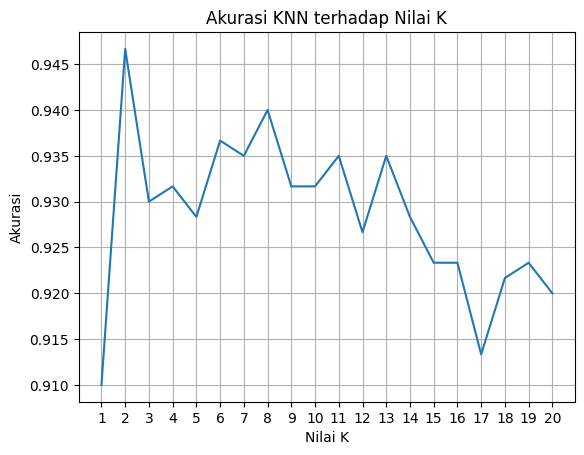

In [38]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Rentang nilai N yang ingin diuji
k_values = range(1, 21)

# Menyimpan akurasi untuk setiap nilai K
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Menggunakan cross-validation untuk mendapatkan akurasi
    scores = cross_val_score(knn, train_features, train_labels, cv=10)  # cv=10 untuk 10-fold
    accuracies.append(scores.mean())  # Rata-rata akurasi

# Menemukan nilai N terbaik
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print(f'Nilai K terbaik: {best_k}')
print(f'Akurasi terbaik: {best_accuracy * 100:.2f}%')

# Plotting Hasil
plt.plot(k_values, accuracies)
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.title('Akurasi KNN terhadap Nilai K')
plt.xticks(k_values)
plt.grid()
plt.show()


Berdasarkan hasil K-Fold Cross Validation, didapat bahwa K yang memiliki akurasi tertinggi adalah 2.

### Melakukan klasifikasi dengan K = 2

In [39]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_features, train_labels)

KNeighborsClassifier(n_neighbors=2)

### Melakukan Prediksi dengan data uji

In [40]:
# Memprediksi setiap gambar dalam data uji menggunakan loop
predictions = []

for features in test_features:
    # Prediksi label untuk fitur saat ini
    prediction = knn.predict([features])  # Input harus berbentuk array 2D
    predictions.append(prediction[0])  # Menambahkan prediksi ke dalam daftar

# Menghitung akurasi dari prediksi
accuracy_uji = accuracy_score(test_labels, predictions)
print(f'Akurasi pada data uji: {accuracy_uji * 100:.2f}%')


Akurasi pada data uji: 100.00%


## Evaluasi model dengan Confusion matrix

### Membuat Confusion Matrix

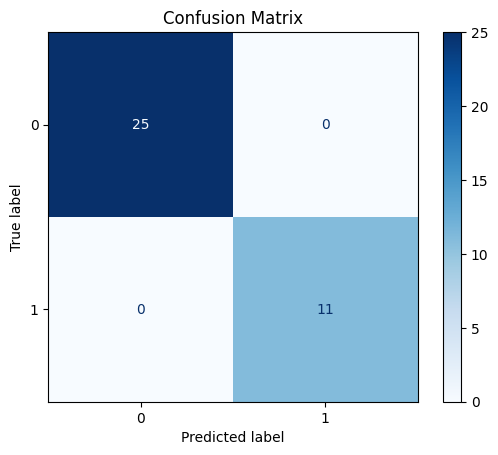

In [41]:
cm = confusion_matrix(test_labels, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # Menggunakan colormap biru untuk visualisasi
plt.title('Confusion Matrix')
plt.show()

### Classification report

In [42]:
classification_rep = classification_report(test_labels, predictions)
print(classification_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

